# Investigating Fandango Movie Ratings

In 2015 a data journalist analyzed movie ratings on the popular online movie ratings aggregator Fandango's website. Walter Hickey found that there was a significant discrepancy between the number of stars displayed to users and the actual rating of the movie. He found several instances where ratings were rounded up to the neared half star, or in some cases rounded up to the nearest whole star. Fandango has since claimed they have fixed their ratings, but we are unable to tell for sure because they have removed the actual rating value on the page's HTML. 

## Objective
In this project, we will explore whether there has been an actual change in Fandango's rating system since Walter Hickey's analysis.

### Information about the data

Walt Hickey made the data he analyzed publically available on Github. We will use this data to analyze the characteristics of the data before his analysis.

We also have data on movie ratings for movies released in 2016 and 2017 also available on GitHub. We'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
before_data = pd.read_csv('fandango_score_comparison.csv')
after_data = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
before_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
after_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


We will isolate the columns in each dataset that offer information about Fandango's ratings

In [5]:
before = before_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after = after_data[['movie','year','fandango']]

Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analyis is made of all the movie ratings stored on Fandango's website.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions.

## Changing the Goal of Our Analysis

Our previous goal was to determine if there have been any changes in Fandango's rating system after Hickey's analysis. After examining the differences in the datasets we have available, lets restructure our goal. Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## Isolating the Samples We Need
With this new research goal, we have two populations of interest:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Lets first check our "before" data set to check if there are any unpopular movies in our dataset. The documentation states clearly that there're only movies with at least 30 fan ratings, but we can screen for this quickly

In [6]:
before[before['Fandango_votes'] < 30].shape[0]

0

In [7]:
before

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


No movies in our "before" dataset have less than 30 fan ratings.

Lets examine our "after" dataset.

In [8]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


We quickly realize that this dataset does not have information about the number of fan ratings.
We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [9]:
after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

### Isolating 2015 and 2016 Films

Looking at our datasets, we learn that some movies were not released in either 2015 or 2016. We will isolate movies that only were released in these years into separate datasets

In [10]:
after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = after[after['year']==2016]

In our 'before' dataset, the year the film released is contained in the "FILM" column. We will need to extract this value from this column.

In [12]:
before['Year'] = before['FILM'].str[-5:-1].copy()
before['FILM'] = before['FILM'].str[:-7]

C:\Users\u6077541\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\u6077541\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
Year                    146 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 6.9+ KB


In [14]:
fandango_2015 = before[before['Year'] == '2015'].copy()

In [15]:
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [21]:
fandango_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015
5,The Water Diviner,4.5,4.0,397,0.5,2015
6,Irrational Man,4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie,4.5,4.0,896,0.5,2015
9,Love & Mercy,4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd,4.5,4.0,804,0.5,2015


# Comparing Distribution Shapes for 2015 and 2016

Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the FiveThirtyEight style for the plots.

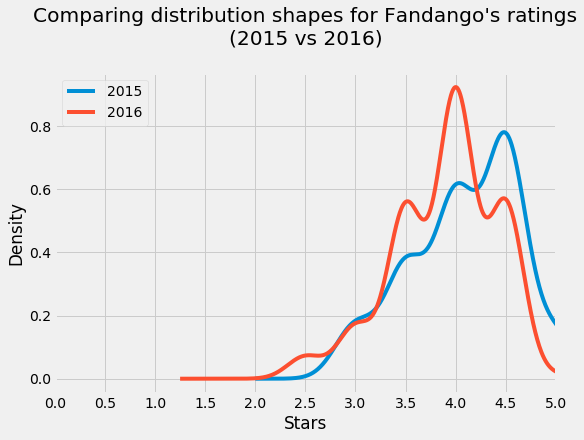

In [35]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = 2015,xticks=arange(0,5.5,0.5),legend=True,figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = 2016,legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xlim(0,5)
plt.show()

Now that we have visualized the distribution of ratings, we can see a few trends

- Both datasets are strongly left-skewed
- 2016 data is slightly shifted to the left from the 2015 data.

The left skew indicates that movies in general on this platform are given high or very high ratings.

The left shift in 2016 data is interesting for our analysis. This indicates that ratings in 2016 were lower than for 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies

It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [36]:
print('2015' + '\n' + '-' * 16)

fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [37]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Upon analyzing relative frequencies, we can see there is a downward shift in movie ratings from 2015 to 2016.

No movies had less than a 3.0 rating in 2015, but in 2016 some popular movies received this rating. In 2016, less than 1% of movies had a 5 star rating, while in 2015 7% had a 5 star rating. 

Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of the Change
Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [45]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015,median_2015,mode_2015]
summary['2016'] = [mean_2016,median_2016,mode_2016]
summary.index = ['mean','median','mode']

(0, 5)

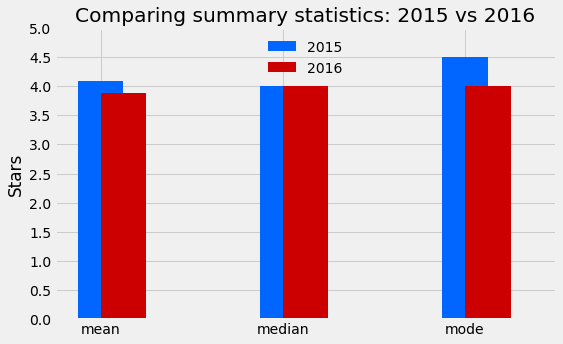

In [53]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.yticks(arange(0,5.1,.5))
plt.ylim(0,5)

Our analysis shows there is indeed a difference in the datasets. The mean star rating decreased from roughly 4.1 to 3.8 stars from 2015 to 2016. The median rating remained at 4.0, which contradicts our belief that ratings dropped. However the most frequent rating dropped from a 4.5 to a 4.0 

# Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.